In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airbnb = pd.read_csv('airbnb.csv')

1. Jelaskan apa gambaran besar yang anda dapatkan dari data tersebut.

In [3]:
# melihat gambaran besar data airbnb, berupa jumlah data (baris) dan variabel (kolom)
airbnb.shape

(48895, 16)

2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.

In [4]:
# cek tipe data setiap kolom
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# menampilkan properties data dari setiap kolom berupa nama kolom, jumlah data dan tipe data
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# menampilkan jumlah data hilang (missing value) dari setiap kolom
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

3. Tunjukkan jumlah data, mean, median, dan standar deviasi.

In [7]:
# menampilkan nilai mean, median, standar deviasi dan nilai minimal dan maksimal dari kolom yang berisi data numerik
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


4. Berapa harga minimal dan maksimal?

In [8]:
# harga minimal
print('Harga minimal:' + str(airbnb['price'].min()))
# harga minimal
print('Harga maksimal:' + str(airbnb['price'].max()))

Harga minimal:0
Harga maksimal:10000


5. Selesaikan masalah missing value dengan cara berikut:
  
  a. Drop kolom-kolom yang mengandung missing value yang tidak dalam diisi dengan nilai yang logis seperti `nama`, `host_id`, dan lain-lain.
  
  b. Isi missing value pada kolom `last_review` dengan data yang paling banyak muncul.
  
  c. Isi missing value pada kolom `reviews_per_month` dengan mean.

In [9]:
# Drop kolom-kolom yang mengandung missing value yang tidak dalam
# diisi dengan nilai yang logis, seperti nama, host_id, dan lain-lain.
airbnb.drop(['name', 'host_id', 'host_name'], axis=1, inplace=True)

In [10]:
# Isi missing value pada kolom last_review dengan data yang paling banyak muncul.
airbnb['last_review'] = airbnb['last_review'].fillna(airbnb['last_review'].mode()[0])

In [11]:
# Isi missing value pada kolom reviews_per_month dengan mean.
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(airbnb['reviews_per_month'].mean())

In [12]:
# Cek hasil akhir data
airbnb.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

6. Buat kategori berdasarkan `price`: **Cheap**, **Medium**, dan **Expensive**

In [13]:
# Cek statistik data price
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [14]:
# Gunakan nilai Q1(25%), Q2(50%), Q3(75%) untuk menentukan kategori Cheap, Medium, dan Expensive
airbnb['category'] = np.where(airbnb['price'] > 175, 'Expensive',
                              (np.where(airbnb['price'] <= 69, 'Cheap', 'Medium')))

7. Filter semua data yang memiliki `last_review` di `> 2019`

In [15]:
# Karena kolom last_review masih bertipe string, konversi terlebih dahulu menjadi datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format='%Y-%m-%d')

In [16]:
# Cek untuk memastikan data last_review sudah berubah menjadi datetime
airbnb[['last_review']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  48895 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 382.1 KB


In [17]:
# Filter semua data yang memiliki last_review di > 2019
airbnb[(airbnb['last_review'] > '2019')]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Expensive
7,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Medium
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Medium
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


8. Visualisasikan `price` untuk membandingkan harga kamar yang tersedia 

In [18]:
# Import module Counter untuk menghitung jumlah kategori harga
from collections import Counter

In [19]:
# Hitung jumlah kategori harga dari tabel
price_category = Counter(airbnb['category'])
price_category

Counter({'Medium': 24347, 'Expensive': 12177, 'Cheap': 12371})

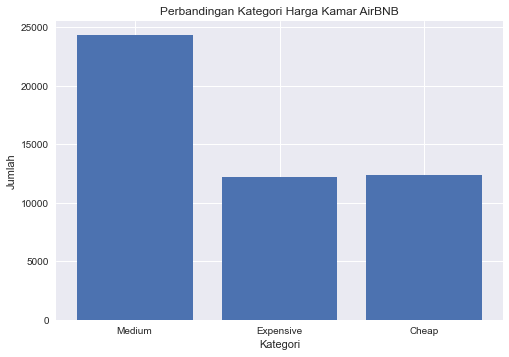

In [20]:
# print(plt.style.available)
plt.style.use('seaborn')
plt.bar(price_category.keys(), price_category.values())
plt.title('Perbandingan Kategori Harga Kamar AirBNB')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

---

In [21]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [22]:
# plt.scatter(airbnb['latitude'], airbnb['longitude'], s=1)
# plt.show()

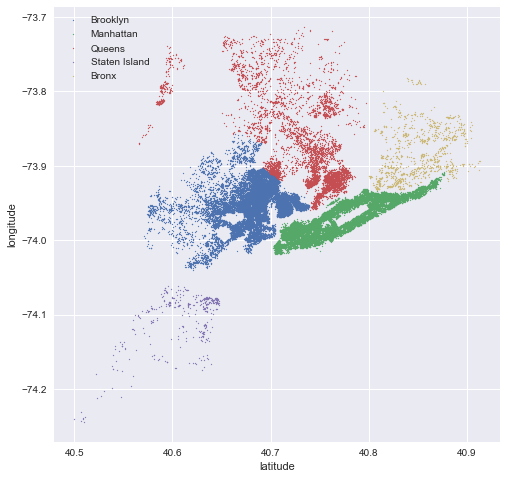

In [23]:
xb = airbnb['latitude'][airbnb['neighbourhood_group'] == 'Brooklyn']
yb = airbnb['longitude'][airbnb['neighbourhood_group'] == 'Brooklyn']

xm = airbnb['latitude'][airbnb['neighbourhood_group'] == 'Manhattan']
ym = airbnb['longitude'][airbnb['neighbourhood_group'] == 'Manhattan']

xq = airbnb['latitude'][airbnb['neighbourhood_group'] == 'Queens']
yq = airbnb['longitude'][airbnb['neighbourhood_group'] == 'Queens']

xs = airbnb['latitude'][airbnb['neighbourhood_group'] == 'Staten Island']
ys = airbnb['longitude'][airbnb['neighbourhood_group'] == 'Staten Island']

xbr = airbnb['latitude'][airbnb['neighbourhood_group'] == 'Bronx']
ybr = airbnb['longitude'][airbnb['neighbourhood_group'] == 'Bronx']

plt.figure(figsize=(8, 8))
plt.scatter(xb, yb, s=1, label='Brooklyn')
plt.scatter(xm, ym, s=1, label='Manhattan')
plt.scatter(xq, yq, s=1, label='Queens')
plt.scatter(xs, ys, s=1, label='Staten Island')
plt.scatter(xbr, ybr, s=1, label='Bronx')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.legend()
plt.show()

In [24]:
airbnb.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Medium
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium


In [25]:
import seaborn as sns

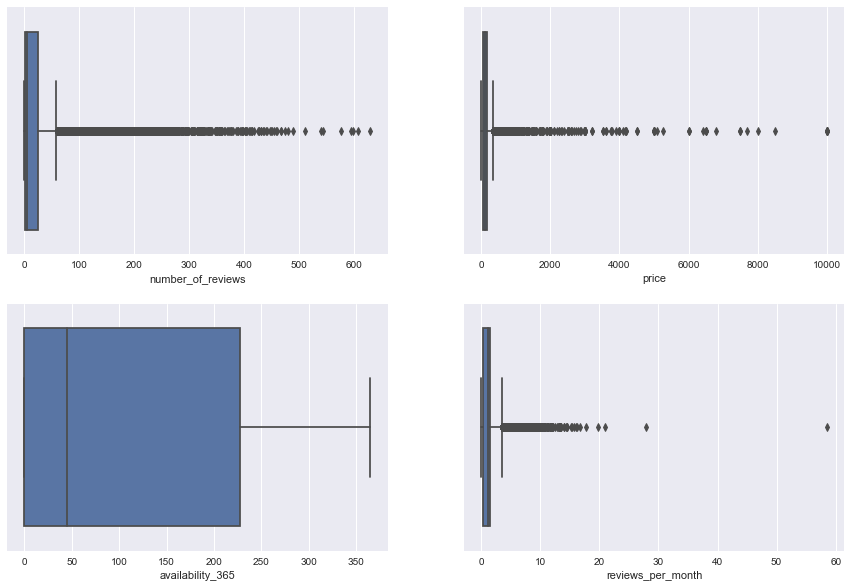

In [26]:
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.boxplot(x=airbnb['number_of_reviews'])

ax=plt.subplot(222)
sns.boxplot(x=airbnb['price'])

ax=plt.subplot(223)
sns.boxplot(x=airbnb['availability_365'])

ax=plt.subplot(224)
sns.boxplot(x=airbnb['reviews_per_month'])
plt.show()

In [27]:
# Cek statistik data price
airbnb[['number_of_reviews', 'price', 'reviews_per_month']].describe()

,number_of_reviews,price,reviews_per_month
count,48895.000000,48895.000000,48895.000000
mean,23.274466,152.720687,1.373221
std,44.550582,240.154170,1.497775
min,0.000000,0.000000,0.010000
25%,1.000000,69.000000,0.280000
50%,5.000000,106.000000,1.220000
75%,24.000000,175.000000,1.580000
max,629.000000,10000.000000,58.500000


In [28]:
IQR = 24 - 1 # IQR = Q3 - Q1
# Filter data antara Q1 - (1.5 IQR) dan Q3 + (1.5 IQR)
filter = (airbnb['number_of_reviews'] >= 1 - 1.5 * IQR) & (airbnb['number_of_reviews'] <= 24 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]

IQR = 175 - 69 # IQR = Q3 - Q1
# Filter data antara Q1 - (1.5 IQR) dan Q3 + (1.5 IQR)
filter = (airbnb['price'] >= 69 - 1.5 * IQR) & (airbnb['price'] <= 175 + 1.5 *IQR)
airbnb2=airbnb1.loc[filter]

IQR = 1.58 - 0.28 # IQR = Q3 - Q1
# Filter data antara Q1 - (1.5 IQR) dan Q3 + (1.5 IQR)
filter = (airbnb['reviews_per_month'] >= 0.28 - 1.5 * IQR) & (airbnb['reviews_per_month'] <= 1.58 + 1.5 *IQR)
airbnb_new=airbnb2.loc[filter]

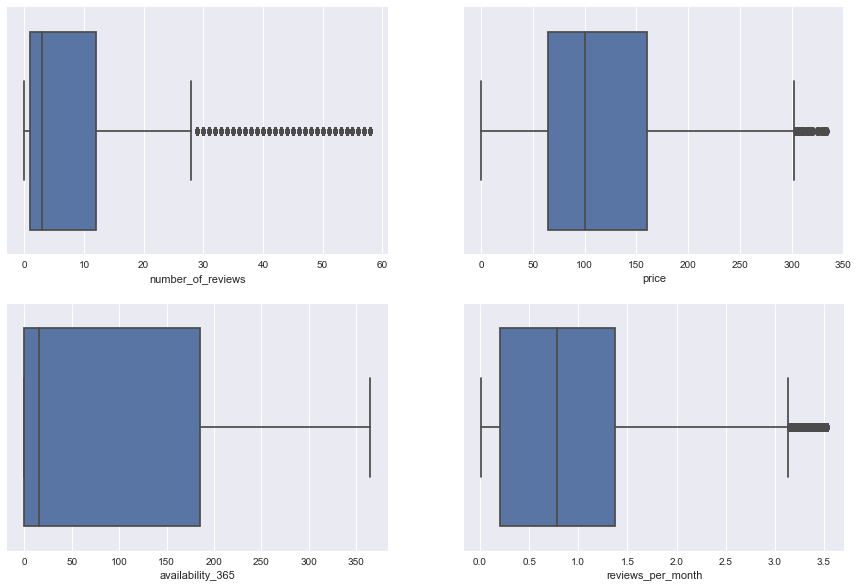

In [29]:
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.boxplot(x='number_of_reviews', data=airbnb_new)

ax=plt.subplot(222)
sns.boxplot(x='price', data=airbnb_new)

ax=plt.subplot(223)
sns.boxplot(x='availability_365', data=airbnb_new)

ax=plt.subplot(224)
sns.boxplot(x='reviews_per_month', data=airbnb_new)
plt.show()

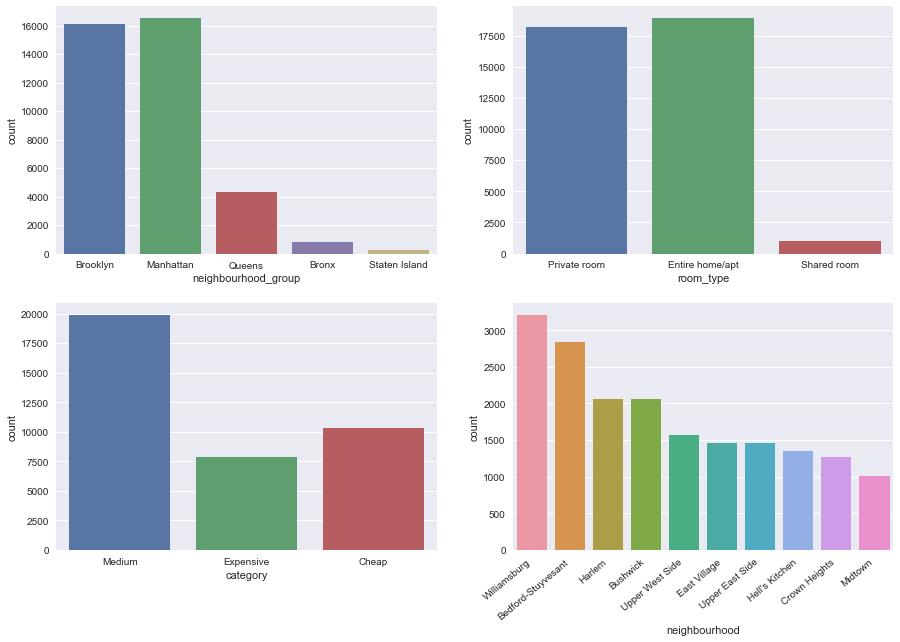

In [30]:
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.countplot(x='neighbourhood_group', data=airbnb_new)

ax=plt.subplot(222)
sns.countplot(x='room_type', data=airbnb_new)

ax=plt.subplot(223)
sns.countplot(x='category', data=airbnb_new)

ax=plt.subplot(224)
sns.countplot(x='neighbourhood', order=airbnb_new.neighbourhood.value_counts().iloc[:10].index, data=airbnb_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

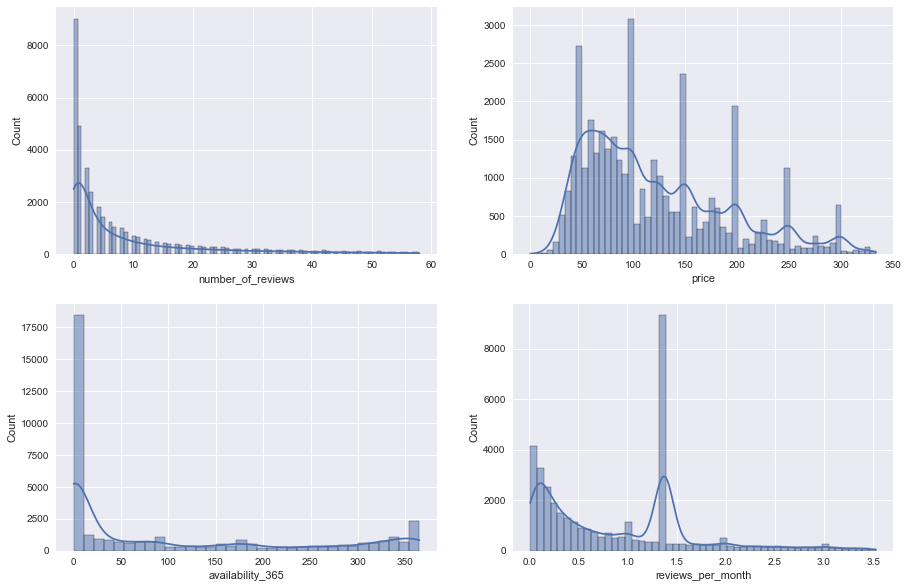

In [31]:
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.histplot(x='number_of_reviews', data=airbnb_new, kde=True)

ax=plt.subplot(222)
sns.histplot(x='price', data=airbnb_new, kde=True)

ax=plt.subplot(223)
sns.histplot(x='availability_365', data=airbnb_new, kde=True)

ax=plt.subplot(224)
sns.histplot(x='reviews_per_month', data=airbnb_new, kde=True)
plt.show()

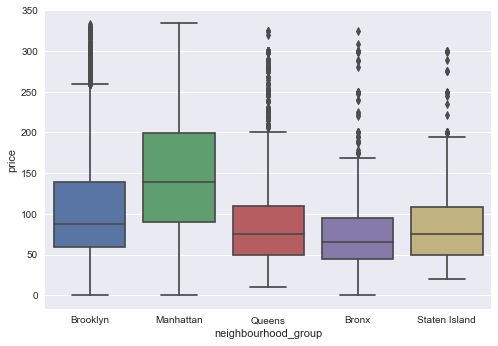

In [32]:
sns.boxplot(x='neighbourhood_group', y='price', data=airbnb_new)
plt.show()

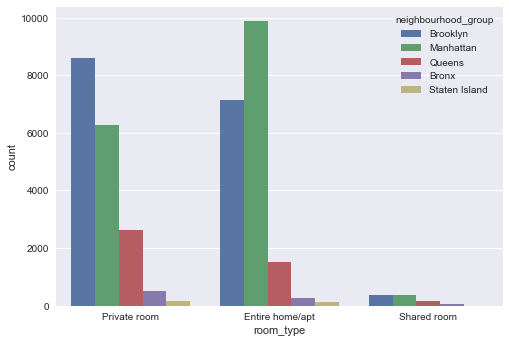

In [33]:
sns.countplot(x='room_type', hue='neighbourhood_group', data=airbnb_new)
plt.show()

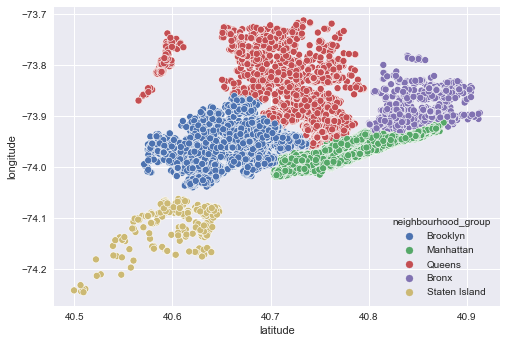

In [34]:
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=airbnb_new)
plt.show()

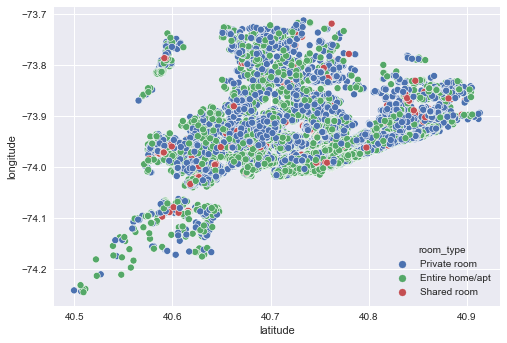

In [35]:
sns.scatterplot(x='latitude', y='longitude', hue='room_type', data=airbnb_new)
plt.show()

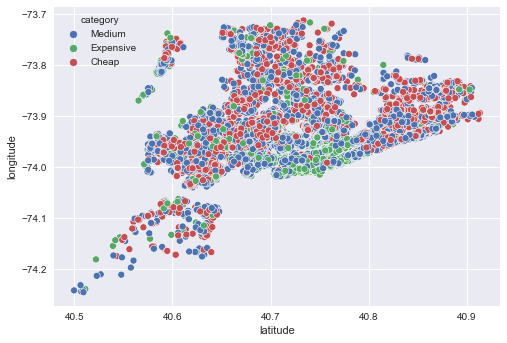

In [36]:
sns.scatterplot(x='latitude', y='longitude', hue='category', data=airbnb_new)
plt.show()

In [37]:
# sns.scatterplot?

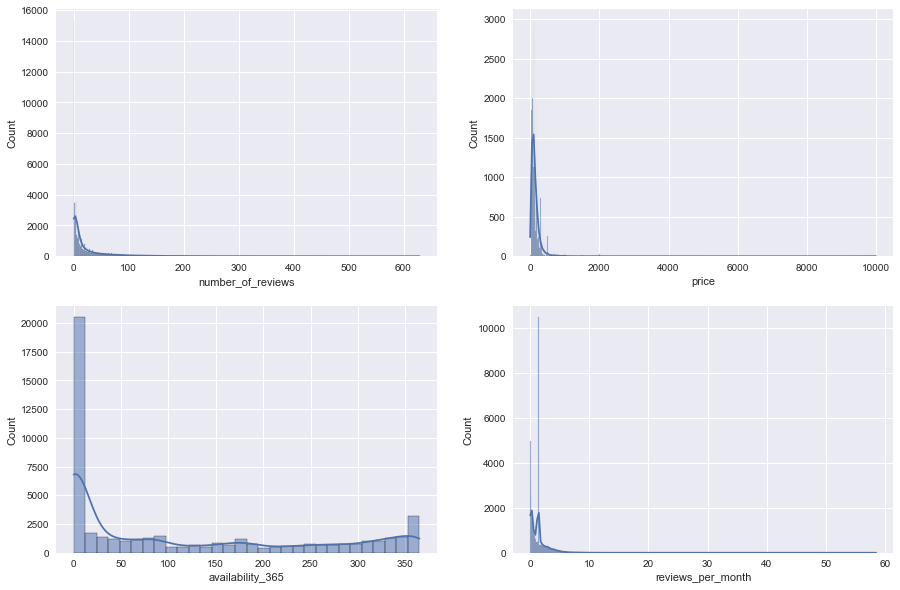

In [38]:
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.histplot(x='number_of_reviews', data=airbnb, kde=True)

ax=plt.subplot(222)
sns.histplot(x='price', data=airbnb, kde=True)

ax=plt.subplot(223)
sns.histplot(x='availability_365', data=airbnb, kde=True)

ax=plt.subplot(224)
sns.histplot(x='reviews_per_month', data=airbnb, kde=True)
plt.show()